# Introduction to Data Science

The goal of data science is to discover knowledge from the data set. Data Science
is a mix of mathematics, statistics, data analysis, and machine learning with
a very healthy dose of visualization.

Data science is increasingly becoming a key tool in research. Jim Gray, of
Microsoft fame "...imagined data science as the ‘fourth paradigm’ of science".
There is evidence of this by this increased number of new degrees in data
science being offered, the increasing number of research papers in
non-Machine Learning conferences. Keep in mind that Data Science is
different from Machine Learning but they are connected.

The first step in Data Science, and one that will be explored in this
workshop, is to explore your data set and understand it. From understanding
your data set can come the extraction of information.

With this in mind, let's jump into the first data set.

---

<a id='First Problem'></a>
# 1. First Data Set - Predict Weight and Height based on Gender

The first problem is a very simple data set that contains height, weight, and gender data
from <a href="https://www.kaggle.com/mustafaali96/weight-height">Kaggle</a>. It makes a
good data set to begin understanding "data science".

The Kaggle data file used in this section is located in a sub-directory in this container.
The container is <tt>/data</tt>.

Our first step is to load the data using Pandas.

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("data/weight-height.csv")

<a id='Initial Examination - First'></a>
## 1.1 Initial Examination of Data Set

Once the data set is loaded, a good first step is to do a quick examination
of the data set itself.

To start, let's look at the first 5 rows of the dataset to see how the data
is organized.

In [ ]:
dataset.head(5)

Let's do the same thing but for the last 5 rows.

In [ ]:
dataset.tail(5)

Let's get the "shape" of the data set. We can use this information to
make sure we have the correct number of rows (data point) and columns
(independent variables and dependent variables).

In [ ]:
dataset.shape

There are 10,000 data points in the data set and 3 variables (<tt>gender</tt>,
<tt>height</tt>, and <tt>weight</tt>). 

Let's use some standard Pandas methods to get examine the data set.
The first method is "info". This gives you some information about the
data frame. Note that it includes the names of the columns.

In [ ]:
dataset.info()

The output from the "info" method gives us some information about the
Pandas data frame. It tells us number of "non-null" data points (it should be
the same as the output from the "shape" method). It also tells you the data
type for each variable. Finally, it tells you the amount of memory used by the data frame.

What else do you observe from the output?

The output from the method refers to "non-null" values. It's possible for the data set to
include non-numeric values. The next section briefly explores that.

<a id='Missing Data - First'></a>
## 1.2 Missing Data

Sometimes data sets contain missing values that need to be found and corrected.
Generically, this is referred to as "Missing Data" within Pandas. 

Sometimes data contains non-numeric value such as NaN ("Not a Number"), or a "null".
We need numeric data in our computations, so we need to correct these values.
Pandas refers to these values as "missing data". Pandas marks values with  NaNs,
etc, as "null". So we only need to focus on those values.

The first step is to find out if we have any "missing data" in the data frame.
We can use a couple of methods within the data frame object for this.

<strong>Reference</strong>:
<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html">Pandas reference</a>

In [ ]:
dataset.isnull().values.any()

In [ ]:
dataset.isnull().sum()

What do you see?

<a id='Summary Statistics - First'></a>
## 1.3 Summary Statistics

Since the data set seems OK, let's now compute the summary statistics. Pandas has a
built-in method for computing everything, <tt>describe</tt>. The defaults for this
method compute and print the following statistical measures.
    
1. count - how many rows in each column (independent variable)
2. mean
3. standard deviation
4. minimum value
5. value for 25% percentile
6. value for 50% percentile
7. value for 75% percentile
8. maximum value
    
The percentiles can be adjusted by giving Pandas an input list of the desired values.
For the example, let's leave everything as default.

Let's look at the data for the entire population, then women, then men.

In [ ]:
dataset.describe()

<a id='Split Data Set - First'></a>
### 1.3.1 Split Data Set into Men and Women

Before continuing, let's split the data set into men and women. This makes
it easier to examine the two dependent variables (men and women) to be examined
independently.

In [ ]:
dataset_men = pd.DataFrame()
dataset_women = pd.DataFrame()

men = dataset['Gender'] == 'Male'
dataset_men = dataset[men]

women = dataset['Gender'] == 'Female'
dataset_women = dataset[women]

<a id='Summary Stats for both - First'></a>
### 1.3.2 Summary Statistics for the two data sets

Let's look at the data for the entire population, then women, then men, in the next
three cells so we can compare them.

In [ ]:
print("Overall dataset")
dataset.describe()

In [ ]:
print("Women subset")
dataset_women.describe()

In [ ]:
print("Men subset")
dataset_men.describe()

If you compare the summary statistics for men and women, are there any observations
you can make? What are they?

<a id='Hand Statistics - First'></a>
### 1.3.3 "Hand" Computed Descriptive Statistics

The describe() method only gives us a few descriptive statistics. Let's compute
some additional ones using either built-in methods or simple computations. The
extra ones we're computing are:

1. median (value in the middle of the data set)
2. mode (most common values)
3. Range (max - min)
4. Variance
5. Standard Deviation (using mean)



<strong>Wikipedia References</strong>:

<a href="https://en.wikipedia.org/wiki/Descriptive_statistics">Wikipedia - Descriptive Statistics</a>

<a href="https://en.wikipedia.org/wiki/Summary_statistics">Wikipedia - Summary Statistics</a>

<a href="https://en.wikipedia.org/wiki/Range_(statistics)">Wikipedia - Range</a>

<a href="https://en.wikipedia.org/wiki/Deviation_(statistics)#Unsigned_or_absolute_deviation">Wikipedia - Deviation</a>

<a href="https://en.wikipedia.org/wiki/Mean_absolute_difference">Wikipedia - Mean Absolute Deviation</a>

<a href="https://en.wikipedia.org/wiki/Distance_correlation#Distance_standard_deviation">Wikipedia - Distance Correlaton</a>

<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Wikipedia - Pearson Correlation Coefficient</a>

<a href="https://en.wikipedia.org/wiki/Skewness">Wikipedia - Skewness</a>

<a href="https://en.wikipedia.org/wiki/Distance_correlation">Wikipedia - Distance Correlation</a>

<a href="https://en.wikipedia.org/wiki/Kurtosis">Wikipedia - Kurtosis</a>

In [ ]:
print("Overall data set")
print(" ")
print("Height data")
print("Height mean = ", dataset["Height"].mean() )
print("Height median = ", dataset["Height"].median() )
print("Height mode = ", dataset["Height"].mode() )
print(" ")
print("Height Max = ",dataset["Height"].max() )
print("Height Min = ",dataset["Height"].min() )
print("Height Range = ", dataset["Height"].max()-dataset["Height"].min() )
print("Height Variance = ",dataset["Height"].var() )
print("Height Standard Deviation = ",dataset["Height"].std() )
print(" ")
print("Weight data")
print("Weight mean = ", dataset["Weight"].mean() )
print("Weight median = ", dataset["Weight"].median() )
print("Weight mode = ", dataset["Weight"].mode() )
print(" ")
print("Weight Max = ",dataset["Weight"].max() )
print("Weight Min = ",dataset["Weight"].min() )
print("Weight Range = ", dataset["Weight"].max()-dataset["Weight"].min() )
print("Weight Variance = ",dataset["Weight"].var() )
print("Weight Standard Deviation = ",dataset["Weight"].std() )

Compute same numbers for men and for women. Women's data set first.

In [ ]:
print("Data set for women")
print(" ")
print("Height data")
print("Height mean = ", dataset_women["Height"].mean() )
print("Height median = ", dataset_women["Height"].median() )
print("Height mode = ", dataset_women["Height"].mode() )
print(" ")
print("Height Max = ",dataset_women["Height"].max() )
print("Height Min = ",dataset_women["Height"].min() )
print("Height Range = ", dataset_women["Height"].max()-dataset_women["Height"].min() )
print("Height Variance = ",dataset_women["Height"].var() )
print("Height Standard Deviation = ",dataset_women["Height"].std() )
print(" ")
print("Weight data")
print("Weight mean = ", dataset_women["Weight"].mean() )
print("Weight median = ", dataset_women["Weight"].median() )
print("Weight mode = ", dataset_women["Weight"].mode() )
print(" ")
print("Weight Max = ",dataset_women["Weight"].max() )
print("Weight Min = ",dataset_women["Weight"].min() )
print("Weight Range = ", dataset_women["Weight"].max()-dataset_women["Weight"].min() )
print("Weight Variance = ",dataset_women["Weight"].var() )
print("Weight Standard Deviation = ",dataset_women["Weight"].std() )

In [ ]:
print("Data set for men")
print(" ")
print("Height data")
print("Height mean = ", dataset_men["Height"].mean() )
print("Height median = ", dataset_men["Height"].median() )
print("Height mode = ", dataset_men["Height"].mode() )
print(" ")
print("Height Max = ",dataset_men["Height"].max() )
print("Height Min = ",dataset_men["Height"].min() )
print("Height Range = ", dataset_men["Height"].max()-dataset_men["Height"].min() )
print("Height Variance = ",dataset_men["Height"].var() )
print("Height Standard Deviation = ",dataset_men["Height"].std() )
print(" ")
print("Weight data")
print("Weight mean = ", dataset_men["Weight"].mean() )
print("Weight median = ", dataset_men["Weight"].median() )
print("Weight mode = ", dataset_men["Weight"].mode() )
print(" ")
print("Weight Max = ",dataset_men["Weight"].max() )
print("Weight Min = ",dataset_men["Weight"].min() )
print("Weight Range = ", dataset_men["Weight"].max()-dataset_men["Weight"].min() )
print("Weight Variance = ",dataset_men["Weight"].var() )
print("Weight Standard Deviation = ",dataset_men["Weight"].std() )

Do these "extra" statistics help you in better understanding your data set?
Are there any additional observations you can make about the dataset?

To make a little easier, let's put all of these statistics in a single Pandas
data frame and print the data frame to stdout.

In [ ]:
dataset_desc = dataset["Height"].describe()
dataset_women_desc = dataset_women["Height"].describe()
dataset_men_desc = dataset_men["Height"].describe()


raw_data = {'Measure': ['mean', 'median', 'min', 'max', 'range', 'variance', 'std dev', '25%', "50%", "75%"],
        'All': [dataset["Height"].mean(), dataset["Height"].median(), dataset["Height"].min(), 
                dataset["Height"].max(), dataset["Height"].max()-dataset["Height"].min(),
                dataset["Height"].var(), dataset["Height"].std(),
                dataset_desc[4], dataset_desc[5], dataset_desc[6] ],
        'Women': [dataset_women["Height"].mean(), dataset_women["Height"].median(), dataset_women["Height"].min(),
                  dataset_women["Height"].max(), dataset_women["Height"].max()-dataset_women["Height"].min(),
                  dataset_women["Height"].var(), dataset_women["Height"].std(),
                  dataset_women_desc[4], dataset_women_desc[5], dataset_women_desc[6] ],
        'Men': [dataset_men["Height"].mean(), dataset_men["Height"].median(), dataset_men["Height"].min(),
                dataset_men["Height"].max(), dataset_men["Height"].max()-dataset_men["Height"].min(),
                dataset_men["Height"].var(), dataset_men["Height"].std(), 
                dataset_men_desc[4], dataset_men_desc[5], dataset_men_desc[6] ]
}

dataset_out = pd.DataFrame(raw_data, columns = ['Measure', 'All', 'Women', 'Men'])
dataset_out

What did you notice in the comparison table?

<a id='Plot the Data - First'></a>
## 1.5 Plot the data

The combination of the human brain and eyes makes for a great pattern
recognition capability. Let's use that capability to better understand the
data and to look for patterns.

Since this dataset only has two independent variables, weight and height, it's
simple to plot the data.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

xwomen = dataset_women['Height']
ywomen = dataset_women['Weight']
xmen = dataset_men['Height']
ymen = dataset_men['Weight']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(xwomen, ywomen, c='b', marker="s", label='women')
ax1.scatter(xmen, ymen, c='r', marker="o", label='men')
plt.legend(loc='upper left');
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Height vs. Weight')
plt.show()

Any observations? 

<a id='Cluster by Gender - First'></a>
## 1.6 Cluster the data for each gender - Kmeans

One quick and easy data analysis we can use that goes beyond data exploration
is clustering (https://en.wikipedia.org/wiki/Cluster_analysis). This technique
seeks to collect the data into clusters where the data in each cluster is similar
to one another. This can help us discover underlying patterns in the data.

Clustering can tell us something about the data set such as where "groups" of
data are located. Clustering can also serve to "label" the data (recall that
many Machine Learning and Deep Learning techniques need labeled data).

The K-means algorithm is fairly simple. It starts with a group of <strong><tt>k</tt></strong>
randomly selected centroids where <tt>k</tt> is an arbitrary number of clusters chosen
by the user). Then the algorithm computes the mean of the data in a specific
cluster to the centroid. It will move the centroids in an effort to minimize
the mean distance. Once the movement in the centroid slows, it will stop
and tell you the clustering was successful. Alternatively, if the centroid
movement is still moving while hitting some iteration limit, it will stop
and return the current centroids.

Below are some images from [an article] (https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1), illustrating a data set with two variables (two columns
of data), and a simple two cluster set of data. The first image is of the raw data.

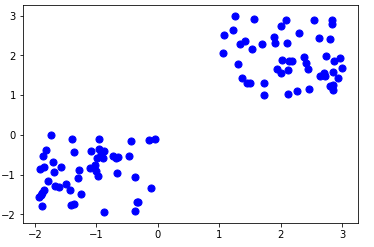

The second image illustrates the result of clustering with k=2. Each cluster is
plotted with it's own color. The centroids are also plotted.

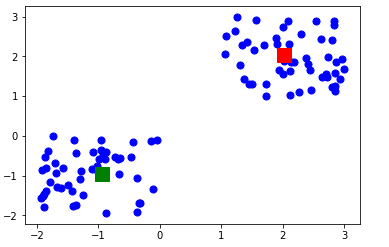

We're going to apply the K-means algorithm from Scikit-learn. We'll also
plot the clusters wit different colors and also plot the centroids.

For the example, <strong><tt>k</tt></strong> has been arbitrarily chose to be 3 in
the cell below. This is for the women's data set.

<strong>Notes</strong>:

1. <a href="https://stackabuse.com/k-means-clustering-with-scikit-learn/">Kmeans article 1</a>

2. <a href="https://dev.to/nexttech/k-means-clustering-with-scikit-learn-14kk">Kmeans article 2</a>

In [ ]:
# K-means clustering and plotting for women
#
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

temp = dataset_women.values[:,1:]

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(temp)

plt.scatter(temp[:,0], temp[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')

plt.title('Women Dataset - Data points and cluster centroids, k=3')
plt.show()

<a id='Cluster for male - First'></a>
### 1.6.1 K-means for Men data set

Let's apply K-means just to the male data set. With the same number of
clusters (3).

In [ ]:
# K-emans clustering and plotting for men
#
from sklearn.cluster import KMeans

temp = dataset_men.values[:,1:]

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(temp)

plt.scatter(temp[:,0], temp[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')

plt.title('Men Dataset - Data points and cluster centroids, k=3')
plt.show()

Observations?

One of the issues of k-means is that you have to pick k before starting
the algorithm. Selecting this value can be difficult. More over, how do you
know if you selected a good value?

<a id='Kmeans Elbow - First'></a>
### 1.6.2 Kmeans - Elbow method

One way around the problem if selecting the best value of k, is called the
"elbow method". It's a graphical technique to estimate the optimal number of
clusters. We use a measure called the within-cluster SSE ("Distortion"). This
is a pretty simple computation for a cluster c_i, the within-cluster sum of
squared error. This formula is below:

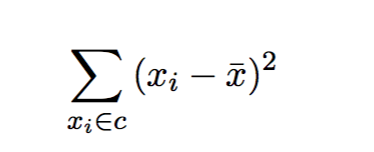

The elbow method varies the value of k and plots the distortion. The optimal
value of <tt>k</tt> is when the distorition is at a minimum (i.e. the value of distortion
starts increasing after it decreases). Howver, you don't have to choose the
optimal value of <tt>k</tt>, which coule be large value. You can choose any value of <tt>k</tt>.
The elbow plot helps you look at small values of <tt>k</tt>.

Let's apply the elbow method to our data set looking at <tt>k=1</tt> to <tt>k=16</tt>.

The woman's data set will be used for this example.

<strong>Notes</strong>:

<a href="https://dev.to/nexttech/k-means-clustering-with-scikit-learn-14kk">Elbow and Kmeans Illustration</a>

In [ ]:
from sklearn.cluster import KMeans

# Calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i,
                n_init=10, max_iter=300,
                tol=1e-04, random_state=0 )
    km.fit(temp)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Which value of <tt>k</tt> would you select? Why?

1. Decrease in distortion as a function of <tt>k</tt> drops off starting with <tt>k=5</tt>.

Is the distortion at <tt>k=15</tt> that much lower than <tt>k=8</tt>? How could you check?

---

<a id='Second Problem'></a>
# 2. Second Data Set - Wine Data Set

This data set is a very popular one from UCI. The <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">Wine Quality</a>
data set has only one independent variable, wine quality, but has more independent variables.
It has fewer points than the previous data set but the increase in independent variables
makes data analysis a bit more difficult - hence it's use as a second example.

In [ ]:
import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

First, let's load the data set.

In [ ]:
wine_set = pd.read_csv("data/winequality-red.csv", sep=';')

<a id='Initial Examination - Second'></a>
## 2.1 Initial Examination of Data Set

Now that the data is loaded, we can take a quick look at the data set using
a few simple commands and methods.

Let's look at first 5 rows (always a good first step).

In [ ]:
wine_set.head(n=5)

Pay attention to the column names (variable names). Also start looking at the
variable values.

We can do the same thing on the last 5 rows of the data set.

In [ ]:
wine_set.tail(n=5)

How many rows does the data set contain?

In [ ]:
wine_set.shape

We can get some general information about the data set using the "info()" method
from Pandas. This information is focused on how the data set is represented.

In [ ]:
wine_set.info()

Notice that there are 1,599 rows in the Data Frame. All of the variables have
the same number of rows (good starting point).

It also shows that the data set is only using 150 KB of memory (pretty small).

<a id='Missing Data - Second'></a>
## 2.2 Missing Data

Before proceeding further we should check the data set for "odd" values
such as NaN's, nulls, etc. This process is not as simple as it seems.
When you encounter these off values what do you do? Do you pull out that
data point (it might have other useful data)? One approach is to
replace these values with a mean, median, or mode.

The first step is to look for null values.

In [ ]:
wine_set.isnull().values.any()

In [ ]:
wine_set.isnull().any()

There are other steps that you can take to "fix" up the data, if needed.

<a id='Summary Statistics - Second'></a>
## 2.3 Summary Statistics

Since the data set seems fine, let's now compute the summary statistics using the
Pandas method <tt>describe</tt>. As a reminder, these are:

1. mean
2. standard deviation
3. minimum
4. 25%, 50%, 75% percentiles
5. maximum value

and can be computed using a single method from Pandas.

In [ ]:
wine_set.describe()

<a id='Hand Statistics - Second'></a>
### 2.3.1 "Hand" Computed Descriptive Statistics

We can look at more detailed stats for each column using our additional
summary statistics. These are additional stats:

1. mean
2. median
3. minimum
4. maximum
5. range
6. variance
7. standard deviation
8. 25%, 50%, 75% percentiles

The table should just about fit on your browser. More variables and
we would have to break up the table.

Take you time looking at these statistics and ask yourself what they are
telling you and how you could them to describe the data to someone else.

In [ ]:
wine_set1 = wine_set["fixed acidity"].describe() 
wine_set2 = wine_set["volatile acidity"].describe()
wine_set3 = wine_set["citric acid"].describe()
wine_set4 = wine_set["residual sugar"].describe()
wine_set5 = wine_set["chlorides"].describe()
wine_set6 = wine_set["free sulfur dioxide"].describe()
wine_set7 = wine_set["total sulfur dioxide"].describe()
wine_set8 = wine_set["density"].describe()
wine_set9 = wine_set["pH"].describe()
wine_set10 = wine_set["sulphates"].describe()
wine_set11 = wine_set["alcohol"].describe()
wine_set12 = wine_set["quality"].describe()



raw_data = {'Measure': ['mean', 'median', 'min', 'max', 'range', 'variance', 'std dev', '25%', "50%", "75%"],
        'fixed acidity': [wine_set["fixed acidity"].mean(), wine_set["fixed acidity"].median(), wine_set["fixed acidity"].min(), 
                          wine_set["fixed acidity"].max(), 
                          wine_set["fixed acidity"].max()-wine_set["fixed acidity"].min(),
                          wine_set["fixed acidity"].var(), wine_set["fixed acidity"].std(),
                          wine_set1[4], wine_set1[5], wine_set1[6] ],
        'volatile acidity': [wine_set["volatile acidity"].mean(), wine_set["volatile acidity"].median(), wine_set["volatile acidity"].min(),
                            wine_set["volatile acidity"].max(), 
                            wine_set["volatile acidity"].max()-wine_set["volatile acidity"].min(),
                            wine_set["volatile acidity"].var(), wine_set["volatile acidity"].std(),
                            wine_set2[4], wine_set2[5], wine_set2[6] ],
        'citric acid': [wine_set["citric acid"].mean(), wine_set["citric acid"].median(), wine_set["citric acid"].min(),
                        wine_set["citric acid"].max(),
                        wine_set["citric acid"].max()-wine_set["citric acid"].min(),
                        wine_set["citric acid"].var(), wine_set["citric acid"].std(), 
                        wine_set3[4], wine_set3[5], wine_set3[6] ],
        'residual sugar': [wine_set["residual sugar"].mean(), wine_set["residual sugar"].median(), wine_set["residual sugar"].min(),
                           wine_set["residual sugar"].max(), 
                           wine_set["residual sugar"].max()-wine_set["residual sugar"].min(),
                           wine_set["residual sugar"].var(), wine_set["residual sugar"].std(), 
                           wine_set4[4], wine_set4[5], wine_set4[6] ],
        'chlorides': [wine_set["chlorides"].mean(), wine_set["chlorides"].median(), wine_set["chlorides"].min(),
                      wine_set["chlorides"].max(), wine_set["chlorides"].max()-wine_set["chlorides"].min(),
                      wine_set["chlorides"].var(), wine_set["chlorides"].std(), 
                      wine_set5[4], wine_set5[5], wine_set5[6] ],
        'free sulfur dioxide': [wine_set["free sulfur dioxide"].mean(), wine_set["free sulfur dioxide"].median(), wine_set["free sulfur dioxide"].min(),
                                wine_set["free sulfur dioxide"].max(), 
                                wine_set["free sulfur dioxide"].max()-wine_set["free sulfur dioxide"].min(),
                                wine_set["free sulfur dioxide"].var(), wine_set["free sulfur dioxide"].std(), 
                                wine_set6[4], wine_set6[5], wine_set6[6] ],
        'total sulfur dioxide': [wine_set["total sulfur dioxide"].mean(), wine_set["total sulfur dioxide"].median(), 
                                 wine_set["total sulfur dioxide"].min(),
                                 wine_set["total sulfur dioxide"].max(), 
                                 wine_set["total sulfur dioxide"].max()-wine_set["total sulfur dioxide"].min(),
                                 wine_set["total sulfur dioxide"].var(), wine_set["total sulfur dioxide"].std(), 
                                 wine_set7[4], wine_set7[5], wine_set7[6] ],                               
        'density': [wine_set["density"].mean(), wine_set["density"].median(), wine_set["density"].min(),
                    wine_set["density"].max(), wine_set["density"].max()-wine_set["density"].min(),
                    wine_set["density"].var(), wine_set["density"].std(), 
                    wine_set8[4], wine_set8[5], wine_set8[6] ],
        'pH': [wine_set["pH"].mean(), wine_set["pH"].median(), wine_set["pH"].min(),
               wine_set["pH"].max(), wine_set["pH"].max()-wine_set["pH"].min(),
               wine_set["pH"].var(), wine_set["pH"].std(), 
               wine_set9[4], wine_set9[5], wine_set9[6] ],                                
        'sulphates': [wine_set["sulphates"].mean(), wine_set["sulphates"].median(), wine_set["sulphates"].min(),
                      wine_set["sulphates"].max(), wine_set["sulphates"].max()-wine_set["sulphates"].min(),
                      wine_set["sulphates"].var(), wine_set["sulphates"].std(), 
                      wine_set10[4], wine_set10[5], wine_set10[6] ],                                
        'alcohol': [wine_set["alcohol"].mean(), wine_set["alcohol"].median(), wine_set["alcohol"].min(),
                    wine_set["alcohol"].max(), wine_set["alcohol"].max()-wine_set["alcohol"].min(),
                    wine_set["alcohol"].var(), wine_set["alcohol"].std(), 
                    wine_set11[4], wine_set11[5], wine_set11[6] ],  
        'quality': [wine_set["quality"].mean(), wine_set["quality"].median(), wine_set["quality"].min(),
                    wine_set["quality"].max(), wine_set["quality"].max()-wine_set["quality"].min(),
                    wine_set["quality"].var(), wine_set["quality"].std(), 
                    wine_set12[4], wine_set12[5], wine_set12[6] ]
}

data_out = pd.DataFrame(raw_data, columns = ['Measure', 'fixed acidity', 'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides', 'free sulfur dioxide',
                                             'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                             'alcohol', 'quality'])
data_out

What do you notice in the data set?

<a id='Plot Data - Second'></a>
## 2.5 Plot the Data

The usual next step for me is to start plotting the data. For the previous
data set this was simple since there were only two independent variables
and we could split the data set so that there was only one dependent data set
for each part of the original data set.

The wine data set has more independent variables but only one dependent variable
(wine quality). A good idea is to start plotting the wine quality versus the
dependent variables. This can help us better understand how these variables impact
the wine quality (dependent variable). 

The first plot is of the wine quality but the qualities are grouped into
three "buckets".

<a id='Categorizing Wine - Second'></a>
### 2.5.1 Categorizing Wine Quality (Dependent Variable as a Function of Independent Variable)

The wine quality is a measure of "performance" of the particular wine.
It is the dependent variable in the data set and the other columns
are independent variables. If we wanted to do "projections" we would need
to develop a model of the data to estimate the quality of wine based on
the other properties. This notebook doesn't cover creating these models,
but to get ready for such a task (machine learning or deep learning), 
we should understand a little more about the "quality" of th wines in
this data set.

The wine quality has a minimum of 3 and a maximum of 8 (sorry - no 10's).
While we can "bin" plot the wine quality, let's make three groups of
wine and look at the number of wines that fall into these groups (recall
that we have 1,599 wines in total).

Lets consider all wines with ratings 7 and above to be of very good quality,
wines with 5 and 6 to be of average quality, and wines less than 5 to be
of worse quality. We compute these using the Pandas Data Frame and simply
output the results in text.

While we're at it, let's print out the summary stats for the data set but
round the values (makes it a little easier to examine).

In [ ]:
n_wines = wine_set.shape[0]

# Number of wines with quality rating above 6
quality_above_6 = wine_set.loc[(wine_set['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

# Number of wines with quality rating below 5
quality_below_5 = wine_set.loc[(wine_set['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

# Number of wines with quality rating between 5 to 6
quality_between_5 = wine_set.loc[(wine_set['quality'] >= 5) & (wine_set['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]

# Percentage of wines with quality rating above 6
greater_percent = n_above_6*100/n_wines

# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))

# Some more additional data analysis
np.round(wine_set.describe())

It looks like the vast majority (82.5%) have quality ratings of 5 or 6 (right
in the middle of the possible rating).

There aren't too many wines, only 63, that have a worse quality. That's (3.9%).

There are 217 wines of very good quality (7 or greater). There are 217 of these
wines, accounting for 13.57% of the total number of wines.

From these numbers, we can make the observation that the distribution of wines
scores is heavily concentrated in the middle (6 or 7), and not so much at the lower
or higher end of the scores. If we want to create a model of the wine scoring, we
will have to be cautious since we may end up modeling the middle range (5 and 6)
pretty well since there are so many wines there, and maybe not modeling the
wines at the lower or higher end so well since there aren't many of them.


<a id='Plot Wine Quality - Second'></a>
### 2.5.2 Plot Wine Quality (Dependent Variable)

The analysis we just completed is good because we can take data sets with a large
range of possible "measures", which we might try to model and condense them into
a few measures for better visibility.

This data set has a dependent variable, "quality" that is the "measure" of the data
set. Let's start looking at the win qualities beginning with counting how many
data points belong in each quality measure.

In [ ]:
wine_set.groupby('quality').size()

Wine quality has values that run from 0 to 10. However, only 6 values
have been used. Using Seaborn we can plot the, using a histogram
(also known as a "countplot" in Seaborn language).

In [ ]:
import seaborn as sns

sns.countplot(x="quality", data=wine_set)
plt.xlabel("Quality level of wine (0-10 scale)")
plt.show()

This plots supports our observation that most of the wines are ranked as 5 or 6.
There are very few wines rated 3 (not so good) or 8 (much better

<a id='Scatter Wine Quality - Second'></a>
### 2.5.3 Scatter Plot of Wine Quality - Dependent Variable vs. Independent Variables

The next step that I like to take is plotting the dependent variable as a function
of the independent variables (I'm assuming there is only one independent variable
in the data set). This translates to a scatter plot of one of the
independent variables versus another one, using the wine quality as a color map
for the data points (each wine quality is a different color).

In the cell below, two variables were chosen, "pH" and "density". You can chose
any two variables you like.

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

sns.set_style('whitegrid');
sns.FacetGrid(wine_set,hue='quality',height=5).map(plt.scatter, 'pH','density').add_legend();
plt.show();

What kind of information can you gather from this particular plot?

Try rotating through the variables to see what the plots look like.
Is there anything important to find? (trust me - there are important
things to "find")

<a id='Pairplots - Second'></a>
### 2.5.4 Pairplots (Matrix of plots of Dependent Variable vs. Independent Variables)

A "pair plot" allows us to see both the distribution of single variables and relationships
between two variables. You end up with a matrix of scatter plots as every independent variable
is plotted against all others. The dependent variable, wine quality, is included as in the
previous plot. That is, different wine qualities are assigned a different color.

For this data set, we end up with 121 scatter plots (11 x 11). For the case when the two
independent variables are the same, a plot on the diagonal, is a
<a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Kernel density estimation</a> (KDE)
is plotted by default (Note - this can be changed to a histogram simply by using the option
<tt>diag_kind='hist'</tt> in the sns function call. 

While we haven't talked about KDE and probably won't, it is closely related to histograms.
A KDE can be endowed with properties such as smoothness or continuity by using a suitable kernel.
That's why we get curves instead of bar charts.

For either a Kernel Density Estimation or a Histogram, a plot of the "bins" of the particular variable
versus the variable value can be created. The wine quality (dependent variable) is included
as a change in color.

The scatter plots on the upper and lower triangles of the matrix, show the relationship
(or lack thereof) between two variables

In general, pair plots are a great method to identify trends for follow-up analysis and,
fortunately, are easily implemented in Python thanks to the Seaborn library. I find the
plots on the diagonal to be very useful. Study them carefully. The plots on the off-diagonal
are also very useful although there are more of them relative to the diagonal plots. I tend
to look for significant things on the "off-diagonal" plots.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(wine_set, hue='quality', height=3)
plt.show()

For this data set, what are these pair plots telling you? There are some observations
you can make about the relationship between pairs of data. 

<a id='Pairplots diagonal - Second'></a>
#### 2.5.4.1 Reproduce On-Diagonal Pairplot

You can "re-produce" the diagonal plots in the pairplot a few ways.

The first way is to use the <tt>pairplot</tt> method and only specify
the specific variable you want to use in your plot. For example, the
pairplot function call could be:

<tt>sns.pairplot(wine_set, hue='quality', vars=['pH'], height=3)</tt>

This will create the diagonal plot when the variable is pH. It will create the
plot using all of the wine qualities with one color per wine quality.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(wine_set, hue='quality', vars=['pH'], height=3)
plt.show()

There are some interesting observations to be made from this plot. What do you see?

The next cell allow you to create an alternative KDE plot for a specific
variable. The down-side to the plot is that it is for all values of wine
quality (dependent variable).

To start, you will have to pick a specific variable you want to examine. Take
note that all of the wine qualities will be used in the plot, so you
get a "smeared" wine quality.

As a reminder, the independent variables are,

'fixed acidity', 'volatile acidity', 'citric acid',
'residual sugar', 'chlorides', 'free sulfur dioxide',
'total sulfur dioxide', 'density', 'pH', 'sulphates',
'alcohol'

In [ ]:
sns.kdeplot(wine_set['citric acid'], label='citric acid', shade=True)

If you want to create a KDE using all of the wine qualities you can use
the code below.

In [ ]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=wine_set, hue='quality') 

g.map(sns.kdeplot, 'sulphates', ax=ax, shade=True)

ax.legend(title='Wine Type')
plt.close(2)

You can also use a "distplot" instead of a KDE plot using the previous code.
This type of plot will create both a histogram and a KDE plot. It also does
it for each wine quality (dependent variable).

Below is an example of the plot using <tt>sulphates</tt> as the independent
variable.

In [ ]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=wine_set, hue='quality',) 

g.map(sns.distplot, 'sulphates', ax=ax)

ax.legend(title='Wine Type')
plt.close(2)

<a id='Pairplots off-diagonal - Second'></a>
#### 2.5.4.2 Reproducing On-Diagonal Pairplot

You can also reproduce an "off-diagonal" plot using a couple of
options.

The first approach just uses the <tt>pairplot</tt> method again
but specifies the two variables to be used.

When using this method, you would normally get 4 plots, 2 for the
diagonals and 2 for the off-diagonals. However, the matrix of
plot is symmetric so to make it easier to read we can tell <tt>pairplo</tt>
to only use the lower diagonal. This eliminates the "upper"
diagonal plot (it can make the plots easier to read).

An example using <tt>pH</tt> and <tt>alcohol</tt> would be:

<tt>sns.pairplot(wine_set, hue='quality', vars=['pH', 'alcohol'], corner=True, height=3)</tt>

The cell below creates the plot.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(wine_set, hue='quality', vars=['pH', 'alcohol'], corner=True, height=3)
plt.show()

What information can you gather from the plots particularly
the off-diagonal plot?

Another option for re-producing the off-diagonal plot is to just
use a scatterplot() method. In Seaborn, we can use <tt>facetgrid</tt>
along with the Matplotlib's <tt>scatter</tt> method. Overall this
produces a nicer plot than just using matplotlib.

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

sns.set_style('whitegrid');
sns.FacetGrid(wine_set,hue='quality',height=5).map(plt.scatter, 'pH','alcohol').add_legend();
plt.show();

<a id='Factorplots - Second'></a>
### 2.5.5 Factorplots (Dependent Variable vs. Independent Variables)

At a high-level, factorplots make it easy to separate plots by categorical classes.

The graphics/statistics library, Seaborn has the ability to easily build conditional
plots of which factor plots are one. This lets us see what the data looks like when
segmented by one or more variables. The easiest way to do this is
through a method named, "factorplot".

As an example, let's plot the alcohol percent on the y-axis and the wine
quality on the x-axis.

Notice that the function has been renamed to "catplot". I have no idea why (factorplot
was much more understandable)

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']
import seaborn as sns

sns.catplot(x="quality", y="alcohol", data=wine_set, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")

plt.title("Alcohol percent in each level of red wine's quality")
plt.show()

In the cell below, try some other simple 2D factorplots. Just be careful
of the x-axis. Using wine quality on the x-axis produces some good information.
Remember the independent variables you can use are:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Be sure you leave spaces in the appropriate names :)

In [ ]:
import seaborn as sns

sns.catplot(x="quality", y="residual sugar", data=wine_set, kind="strip")
plt.xlabel("quality")
plt.ylabel("residual sugar")

plt.title("Residual sugar in each level of red wine's quality")
plt.show()

Notice the "scatter" for a specific wine quality (dependent variable) as a
function of reduced sugar (independent variable). 

Try some other independent variables (you will be surprised at what you will
find).

<a id='Correlation - Second'></a>
## 2.6 Correlation of Features

In general, <a href="https://en.wikipedia.org/wiki/Correlation_and_dependence">correlation</a>
is any statistical relationship between two variables (it can be causal or not). Most commonly,
it refers to the degree to which a pair of variables are <strong>linearly</strong> related.
They can be very useful because they can indicate a <em>predictive relationship</em> that can
be used in practice.

Just remember that correlation is not sufficient to infer a causal relationship
(i.e. "correlation doesn't mean causation").

Classically, the correlation coefficient used most often is the
<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">the Pearson Product-Moment Correlation Coefficient</a> (PPMCC), or "Pearson's correlation coefficient".
It is sensitive to linear relationships between two variables. 

The Pearson Coefficient has values starting with -1 and going to +1. A value of +1 means
the variables have total positive linear correlation (as one variable increases in values,
the other variable increases in value). A value of -1 means there is total negative linear
correlation (as one variable increases, the other variable decreases). A value of 0
indicates there is no linear correlation between the two variables. 

The previous plots are created using a method in Pandas, <tt>plotting.scatter_matrix</tt>,
to look for patterns in the data. As you have probably noticed, a large number of plots were
created using this approach. For an even a larger number of variables, it becomes very, very
difficult to find patterns using this technique. 

Correlation plots provide a simpler visualization representation of how the variables are
related (or not). The Seaborn library can easily compute and create correlation plots.


<strong>References</strong>:

1. <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html">PANDAS correlation</a>

<a id='Heatmap - Second'></a>
### 2.6.1 HeatMap

A good way to look correlations is to use a <a href="https://en.wikipedia.org/wiki/Heat_map">heatmap</a>.
A heatmap is a plot where the colors in the matrix correspond to the values. In our case, the color of
the cells in the matrix are colored to match the correlation. Compare this to the pairplots in the previous
section which were a matrix of plots. Heatmaps are much easier to read and interpret.

For this chart, the correlations are first computed using a Pandas method (<tt>wine_set.corr()</tt>).
These are then plotted in a heatmap using Seaborn. Seaborn uses the method
<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html"><tt>heatmap()<tt></a>
for the plot.

In [ ]:
import seaborn as sns

correlation = wine_set.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

The heatmap plots the correlation between two variables over the range of variables,
independent and dependent. Since there are 12 variables, you will get 144 squares
(12 x 12). These include 11 independent variables and 1 dependent variable

The the squares with positive values show direct linear correlation between
features. That is, if one feature increases, the other one increases. The larger the
value, the stronger the relationship. These squares will be more reddish and tend
toward a value of 1.0

The diagonal squares will always appear as dark red with a correlation of 1. This is
expected since the two variables are the same.

You can use the color map that is a vertical bar to the right of the heatmap. This can
help you identify interesting values of correlation.

The squares that have negative values show strong linear correlation but the
relationship is the inverse. That is, as the value of one feature increases, the
value of the other one reduces. These squares appear more blue.

Finally, squares with a close to zero value appear as white. These indicate that there
is almost no correlation between those two variables.

Notice that the matrix is symmetric. This means it is independent of the order of the
two variables. Therefore you can look at the lower section of the matrix (below the
diagonal) or he upper part of the matrix (above the diagonal). 

A great way to understand your data is to look for large positive correlations,
large negative correlations, and correlations that are close to zero. Noting
these trends can greatly help in understanding your data set.

It can also help when you develop predictive models of the data set. You can use these
general trends to understand the models. If you change one independent variable do
see a trend from the model that matches the trend from the heatmap.

One last comment - if you have a very large number of variables, the heatmap may be
difficult to visualize. You may have to use the values computed by Pandas to look
for the correlation values of interest.

Looking at the heatmap there are several correlation values that might be
interesting. We can take a closer look at these in the next sub-section.

<a id='Detailed Correlation - Second'></a>
### 2.7 Detailed Examination of Correlations

This sub-section builds on the previous section but focuses on a particular pair of
variables. This allows you to get a more detailed examination of the data. It
can also help with identifying correlations that may be of interest.

For the examination let's use a nice plotting routine in Seaborn called,
<a href="https://seaborn.pydata.org/generated/seaborn.regplot.html"><tt>regplot</tt></a>.
It does a couple of really nice things for us:

1. It creates a scatter plot of the two variables for all of the wine qualities
(dependent variable).

2. It will perform a linear regression using the two variables. This can be
extremely advantageous since it shows the correlation relation. Using this
with the scatter plot can give us an idea of what portions of the data are
driving the correlation.


<a id='Examination One - Second'></a>
#### 2.7.1 pH and Fixed Acidity

The first variable combination is pH and fixed acidity. In the heatmap it had
a value of -0.68 (fairly large negative linear correlation). This should give
us a plot that is down and to the right (increase in one variable decreases
the other variable value).

Note that this plot is actually a Seaborn <tt>regplot</tt> and a <tt>distplot</tt>
put together. The method <tt>regplot</tt> is the central scatter plot with the
regression line. The method <tt>distplot</tt> creates a histogram with a line
over the bars that is the KDE (Kernel Density Estimation) for each dependent
variable. The top histogram will be for the x-axis variable, and the histogram
on the right will be for the y-axis variable.

In [ ]:
import seaborn as sns

# Visualize the co-relation between pH and fixed Acidity

# Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = wine_set[['pH', 'fixed acidity']]

# Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

# Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

It's probably difficult to see in the plot, but the function <tt><u>regplot</u></tt> creates
the scatter plot and the linear regression fit. This includes all wine qualities, and
also a 95% confidence interval (it may be difficult to see). It's a very small "shadow"
around the regression line.

Use the histograms to compare to the location of the largest concentration of data points.
Do the histograms capture this concentration?

What sort of things can you observe from this plot?

If you want to get rid of the histograms, you can use the 
<a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html"><tt>lmplot</u></tt> command
instead of <tt>regplot</tt>.

In [ ]:
sns.lmplot(x="fixed acidity", y="pH", data=wine_set)

You can also use <tt>lmplot</tt> to plot a linear regression for every
wine quality. You just add the <tt>hue</tt> option as below.

In [ ]:
sns.lmplot(x="fixed acidity", y="pH", data=wine_set, hue="quality")

I find this type of plot to be useful when the dependent variables is an
integer. You can compare the regressions to see if a certain wine quality
is driving the overall regression in the previous plot. 

<a id='Examination Two - Second'></a>
#### 2.7.2 Fixed Acidity and Citric Acid</strong>

The next plot is of fixed acidity and Citric Acid. In the heatmap it had a
positive value, but not a really dark color of red. The relationship between
these variables should be up and to the right.

In [ ]:
import seaborn as sns

fixedAcidity_citricAcid = wine_set[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

The next plot focuses on the scatter plot with the regression curve.

In [ ]:
sns.lmplot(x="citric acid", y="fixed acidity", data=wine_set)

There seems to be a lot of dispersion in the data although the confidence
interval is fairly small. Remember that the regression line is for all
values of wine quality.

Let's also do a plot with a regression for each wine quality (each one
is a different color).

In [ ]:
sns.lmplot(x="citric acid", y="fixed acidity", data=wine_set, hue="quality")

It's advisable to examine the data using the same set of correlation
plots. Remember the variables you can use are:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Be sure you leave spaces in the appropriate names :)
    
You probably can't do this for all variable combinations but examine the
seemingly dominant variables. 

<strong>Important:</strong> It helps to remember that co-relation does not always
imply causation. Sometimes when you plot graphs for two features, it might show you 
a pattern which might just be a co-incidence. 

<a id='Outlier - Second'></a>
## 2.8 Outlier Detection

Anomaly detection, also called outlier detection, is the identification of rare items,
events or observations which raise suspicions by significantly differing from the majority
of the data. A simple example is below.

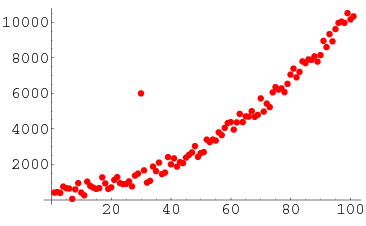

We look for possible outliers in our data so that any data analysis won't be skewed by
these outliers.

An outlier analysis wasn't done for the previous data set (it was designed to get the
basics done) even though that data set had more data points. This data set, the wine
quality data set, has more independent variables so finding outliers may be a more
difficult process, hence this topic is relevant.

<a id='Outlier Visualization - Second'></a>
### 2.8.1 Visualization Methods

Probably the simplest way to look for outliers is to create scatter plots and
look for data points that seem to not belong to the data set as you can see in
the previous plot. This is simple for 2D data.

<strong>Ref</strong>:
    
1. <a href="https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32">Finding Outliers</a>

2. <a href="https://github.com/arshren/MachineLearning/blob/master/Identifying%20outliers.ipynb">Identifying Outliers</a>

<a id='Outlier Visualization Scatter - Second'></a>
#### 2.8.1.1 Scatter Plot

A very simple and easy visualization chart to use is a simeple scatter plot. We've
done these before but let's recreate the scatter plot for a pair of indepedent variables
with an eye toward looking for data points that may be "outliers".

This time let's use Seaborn to create the plot. Let's also set the "hue" of the wine
qualities. 

<strong>Reference</strong>:
<a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">Scatter Plot</a>

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

# Use Seaborn to make scatter plot
import seaborn as sns

sns.scatterplot(x='fixed acidity', y='alcohol', hue='quality', palette="deep", data=wine_set)

Do you see any possible outliers with respect to these two variables?

Try some other variables and see if you can detect any outliers You should
see a number of points that might be outliers.

<a id='Outlier Visualization Box - Second'></a>
#### 2.8.1.2 Box plot

Another visual tool for finding outliers is called a <a href="https://en.wikipedia.org/wiki/Box_plot">Box plot</a>
These plots graphically depict groups of numerical data through their quartiles (e.g. 25%,
50%, 75%). A box plot can be used to find outliers by simply plotting them as individual points.

A sample box plot is shown below
(<a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">reference</a>).

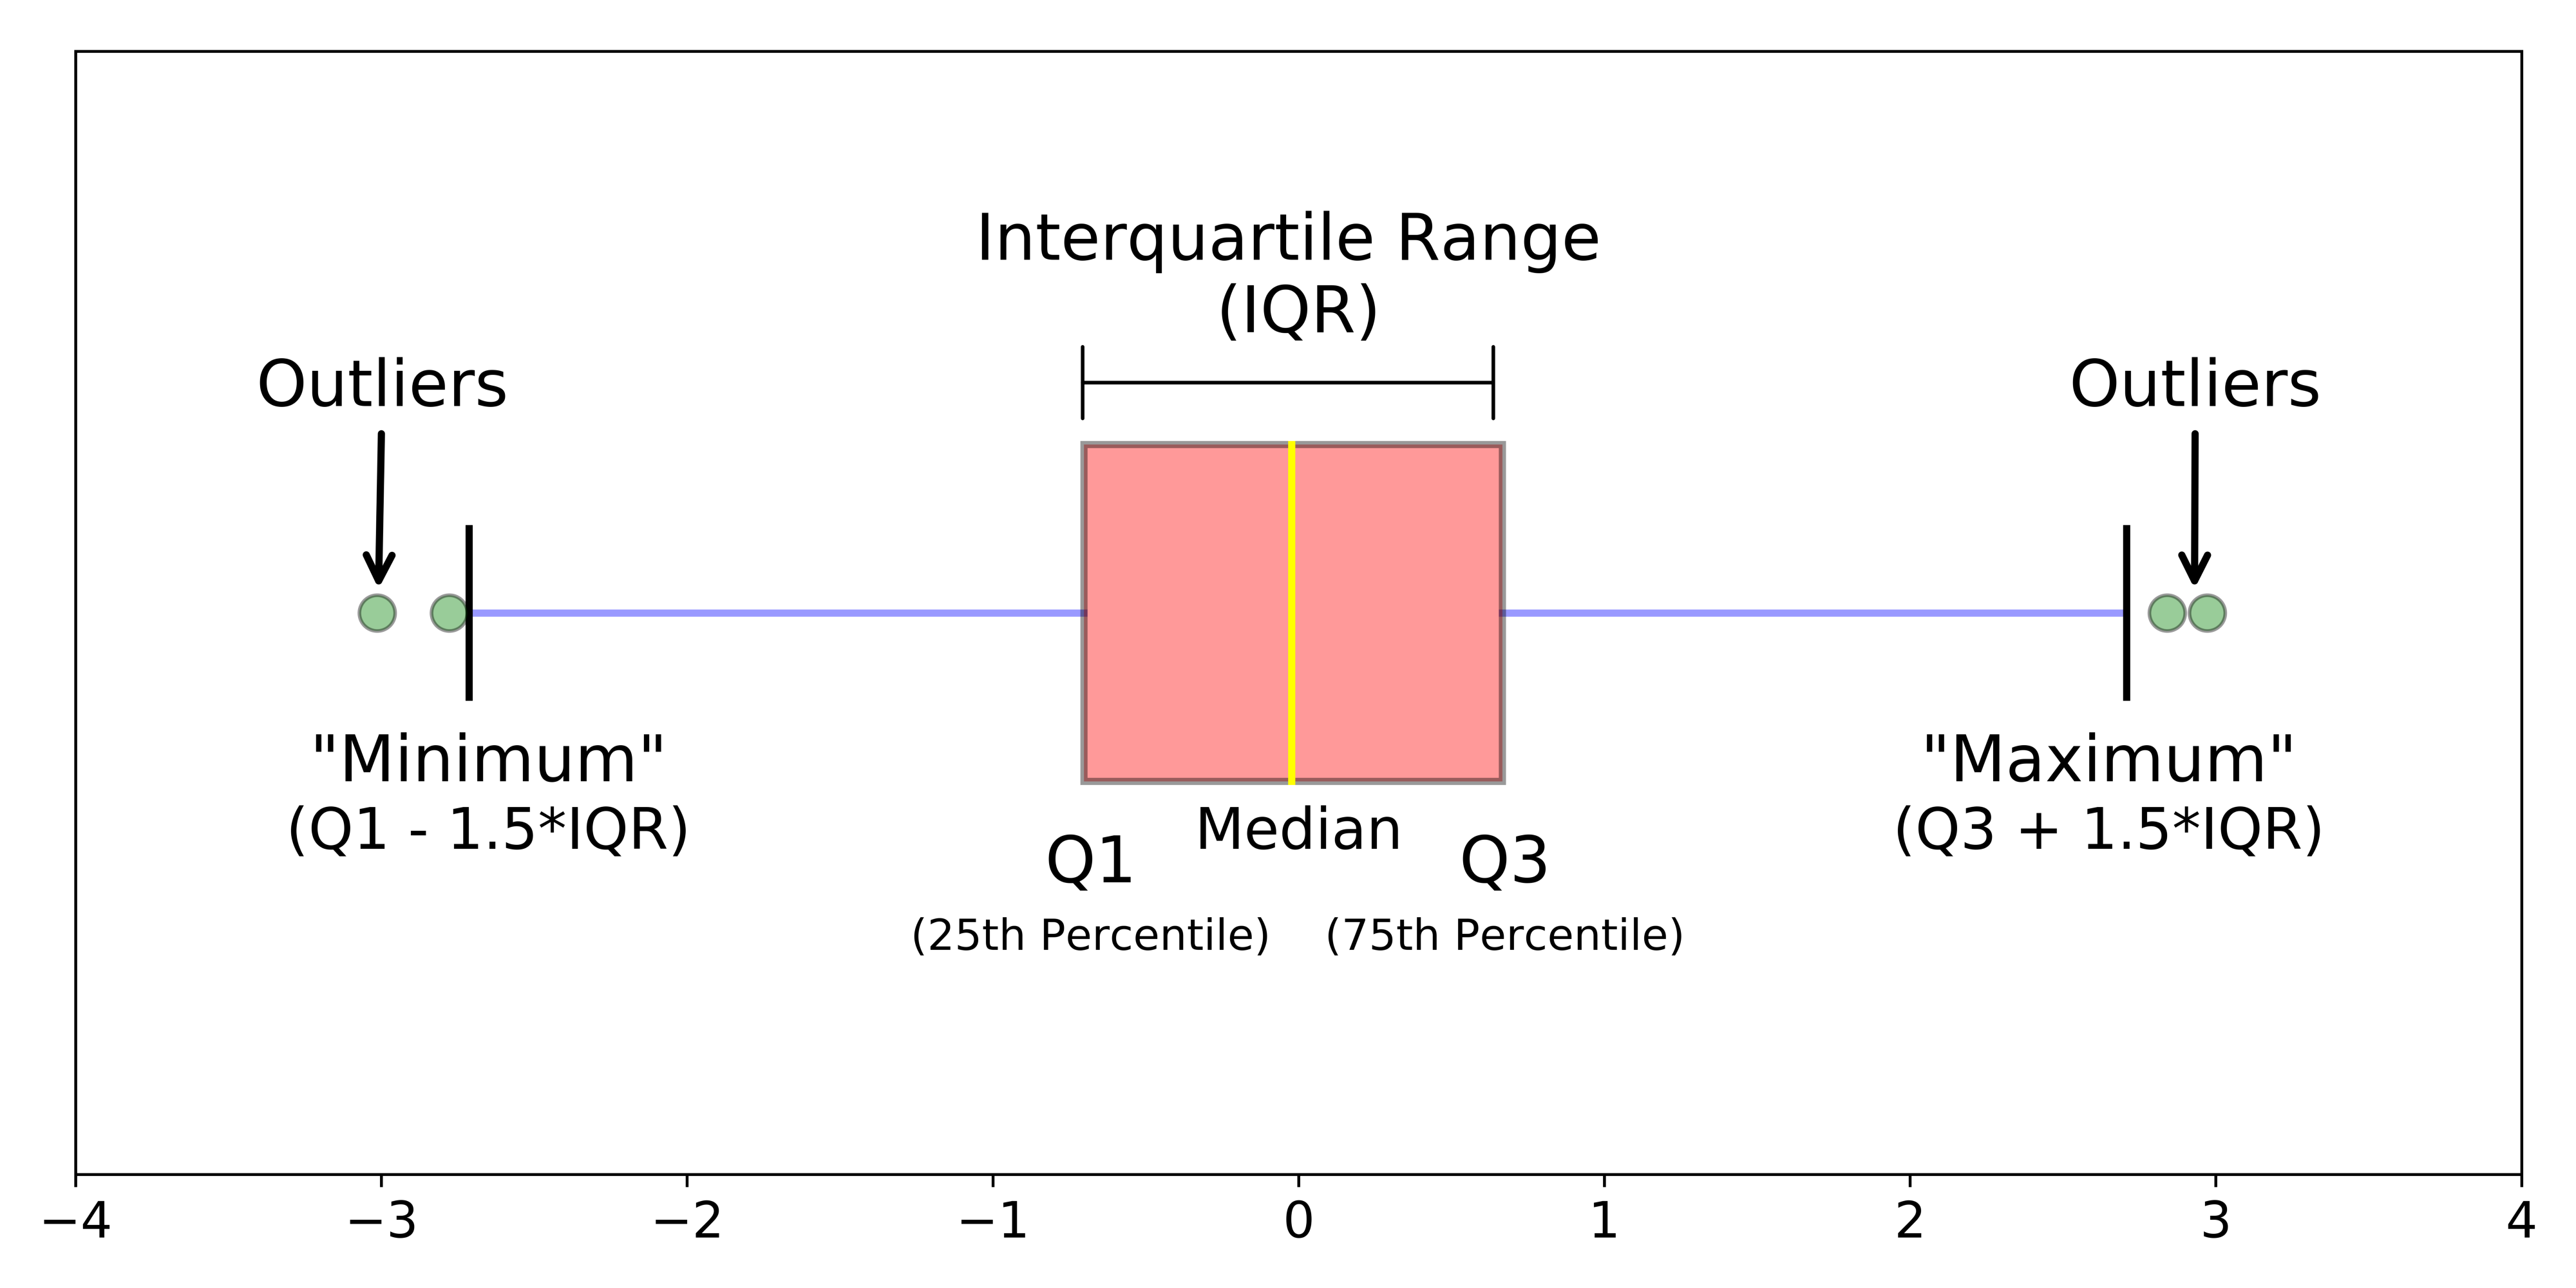

There are a few pieces to this box plot. The box is centered on the median. The
width of the box is from the Q1 (25% quartile) to Q3 (75% quartile). Then two lines are drawn from
the box leading to the "maximum" which is <tt>Q3 + 1.5*IQR</tt>, and from the "minimum"
which is <tt>Q1 - 1.5*IQR</tt>. Any points greater than the "maximum" or less than the
minimum are considered "outliers" in this method.

Box plots can be drawn either horizontally or vertically. The example above is drawn
horizontally (the default with the Seaborn library)

Box plots are non-parametric: they display variations in samples of a statistical
population without making any assumptions of the underlying statistical distribution.
The spacings between the different parts of the box indicate the degree of dispersion
(spread), and skewness in the data, and show outliers.

<strong>Refs</strong>:
    
1. <a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">Ways to Detect and Remove the Outliers</a>

2. <a href="https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn">How To Make Grouped Boxplots in Python with Seaborn?</a>

3. <a href="https://en.wikipedia.org/wiki/Box_plot">Box plots</a>


Let's do a box plot for a single variable first - sulphates.

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol'])

import seaborn as sns

# Box plot 
sns.boxplot(y='sulphates', data=wine_set)

In the plot, you can see the median line, Q3 and Q1, and
the minimum and maximum lines. You can see that are a few variables outside
the expected range (beyond the "maximum"). Some of them are fairly far away
from the median value.

For this case, the boxplot is for all values of wine quality (dependent variable).

You can split out the wine qualitites into their own boxplot as below.

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

import seaborn as sns

# Box plot 
sns.boxplot(x='quality', y='sulphates', data=wine_set)

This a set of box plots, one for each quality, plotting the y-axis with sulphates.
What do you notice right away?

<a id='Outlier Visualization Histogram - Second'></a>
#### 2.8.1.3 Histogram

Another visualization technique for finding outliers is simply creating a
<a href="https://en.wikipedia.org/wiki/Histogram">histogram</a>.

A histogram is an accurate representation of the distribution of numerical data.
To create one, the range of values are divided into a number of "bins". Then you
count how many data set values fall into each bin. In general, the bins are
consecutive and no overlapping.

Let's try creating a simple histogram using the Seaborn method 
<a href="https://seaborn.pydata.org/generated/seaborn.distplot.html">distplot</a>
from the wine data set for "citric acid". Note that the Kernel Kernel Estimation
(KDE) plot is dropped in this plot. Note that the plot uses all values of wine
quality (dependent variable).

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol'])

# Use Seaborn to make scater plot
import seaborn as sns

sns.distplot(wine_set['citric acid'], bins=10, kde=False)

The way to use histograms to look for outliers is to look for "bins" is to look
for bins that are isolated from the other bins. An example of this, from
<a href="https://statisticsbyjim.com/basics/outliers/">this refererence</a>,
illustrates how one could identify outliers using a histogram.

Assume our histogram looks like the following.


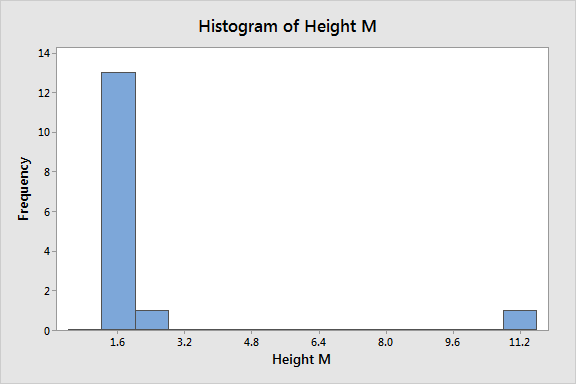

Notice the bin way out at 11.2 from the rest of the bins is "isolated". The bins
immediately next to it are virtually zero. This could indicate that there are outlier
values at a height of 11.2.

To find isolated bins, we might have to use more "bins" to get a better idea of where the
outliers are located (independent value). 

Let's try increasing the number of bins for the wine data set to 50.

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

# Use Seaborn to make scater plot
import seaborn as sns

sns.distplot(wine_set['citric acid'], bins=50, kde=False)

Observations?

You should examine all of the independent variables (there are only 11). This
can be done by creating the plots in a loop. In the cell below <tt>matplotlib</tt>
was used to accomplish this task.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
variables = ['fixed acidity', 'volatile acidity', 'citric acid',
'residual sugar', 'chlorides', 'free sulfur dioxide',
'total sulfur dioxide', 'density', 'pH', 'sulphates',
'alcohol']

for var in variables:
    junk = plt.hist(wine_set[var], bins=50);
    plt.xlabel(var)
    plt.ylabel('Frequency')
    str1 = "Histogram for " + var
    plt.title(str1)
    plt.show()
# end for


Do you see any isolated bins for any variable?

By the way, a good way to look for isolated bins if they have a small frequency,
is to look for the range of values on the x-axis. If you see very small and very
large values that don't appear to have bins, then there is likely to be an
isolated bin there.

<a id='Outlier Visualization Summary - Second'></a>
#### 2.8.2 Visualization Summary

Visualization techniques for finding outliers utilizes your eyes and brain to
find the existence of outliers if not the approximate values. However, "finding"
them is only half the battle. You job is determine if they are truly outliers
or not. More importantly, <strong>an outlier for one variable may be not be an outlier
for another variable</strong>. Handing these situations is why people get paid the big
bucks.

Outlier techniques, even simple ones like creating a scatter-plot, can point out data
points that are not necessarily outliers depending upon your perspective. The data
scientist and the domain specialist working with the data, have to agree that the
indicated data point(s) are actually outliers.

Visualization is one of many techniques for outlier detection. Some of these
techniques are heuristic (rule of thumb). But even these techniques produce
outlier points that are subject to interpretation.

Using visualization techniques is great for which independent variables might
have outliers. If you have a reasonably large number of independent variables
then it can be difficult to scan so many charts. For these situations, you
will have to use some sort of computational method.


<a id='Outlier Statistical - Second'></a>
### 2.8.3 Statistical Methods

The computation method we're going to use is a <em>statistical method</em>.
We are going to focus on two techniques. The first is called <strong>Z-score</strong>
because it uses a statistical measure called a Z-score to find outliers.

The second technique, called <strong>Inter-Quartile Range</strong> or <strong>IQR</strong>,
uses the quartile estimates (e.g. 25% quartile, 50%, 75%, etc.) to estimate when
data points fall outside of an expected range. You saw it used in the box plots in a
previous section.

<a id='Outlier Statistical Z-score - Second'></a>
#### 2.8.3.1 Z-score

An easy statistical method to first try is called the
<a href="https://en.wikipedia.org/wiki/Standard_score">Z-score</a>.
The Z-score is a signed fractional number of standard deviations that a point is
away from the mean value for each data point. If the data point is above the
mean, then the Z-score will be positive. If the Z-score is below the mean, then
it's negative.

The equation below defines the Z scores.

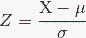

In this equation, "X" is the data point, "mu" is the mean, and "sigma" is 
the standard deviation. Note that the Z-score is dimensionless.

The larger the value of the Z-score, the further the data point is from
the more unusual it is. This could indicate that it is an outlier. At the
very least the data point should be checked before discarding the data point.

Z-scores sound great but as with any statistically measure there can be
issues or limitations. Z-scores can be misleading for small data sets because
the maximum Z-score is limited to (n−1) / √ n.
<a href="https://statisticsbyjim.com/basics/outliers/">reference</a>.
For example, when n=2, the maximum possible Z-score is 0.707. When n=10, the
maximum possible Z-score is 2.846. When n=10,000 the maximum Z-score is
99.99.

To find outliers, you compute the Z-Score for all data points in the
data set are candidate outliers Computing the Z-scores is done for each
variable (i.e. 5 variables, 5 Z-scores per data point).

Next you can search through the Z-scores looking for possible outliers.
You can set a "limit" to an acceptable Z-score and then collect all data
points that "violate" this score for any of the independent variables.
Don't forget that the Z-score can be negative so you could just search for
the absolute value of the Z-score.

With this list of data points you can start to make decisions about keeping
data points or not. Visualization of these data points could prove to be
useful (perhaps plot each variable, one at a time?)
                                         
To get started, let's compute the Z-scores for all the points in the Wine
Data set for "pH" (the independent variable).

In [ ]:
# As a reminder, the variable names are:
# ['fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

# Define variable and storage mean and standar deviation.
test_set = wine_set["pH"]
test_mean = test_set.mean()
test_std_dev = test_set.std()

bounds = 3;  # Number of standard deviations to define an outlier
             # You can vary this parameter. Smaller means more
             # outlier points, larger means fewer outlier points.

# Loop over data set, compute the Z-scores and ad Outliers to
# a list
outliers = []
for x in test_set:
    z_score=(x - test_mean)/test_std_dev
    if (np.abs(z_score) > bounds):
        outliers.append(x)
    #end if
# end for

print("Mean = ",test_mean)
print("Standard Deviation = ",test_std_dev)
print(" ")
print("Number of outliers = ",len(outliers))
print(outliers)

The cell computes the mean for that variable for all wine qualities
(dependent variable). It also computes the standard deviation.

Then it loops over all data points, computes the Z-score, and then
determines if the data point is an outlier by comparing the absolute
value to a Z-score bounds (variable="bounds"). The cell stores the
possible outlier Z-scores in a list.

In this simple example, the value of pH and the wine quality was
not stored. This can be easily corrected with a little coding.

In addition, an abs(Z-score) of 3 was arbitrarily chosen as the cutoff
for an outlier. You can whatever you like (or need). You might even
experiment with various values to see how many outliers are found.

As a reference, for standard distributions, the following percentiles are true:

1x Standard Deviation from the Mean: 68%
2x Standard Deviations from the Mean: 95%
3x Standard Deviations from the Mean: 99.7%

So one standard deviation (Z-score = 1) will contain 68% of the data. Two standard
deviations (Z-score = 2), 95%. And three stand deviations (Z-score = 3), 99.7%.
Arbitrarily picking these scores means that we are trying to container 99.7% of the data.

A difficult aspect of Z-scores is to to select a Z-score where the data point is
considered an outlier. Is it abs(3 * sigma) as it is in this example? Is it
abs(5 * sigma)?

Another difficulty is how do you determine a data point to be an outlier
when it is an outlier for only one independent variable? What if it is
not an outlier with respect to all of the other independent variables?
Is it still an outlier? Should it be dropped from the data set?

Similarly, what do you if it's an outlier for two independent variables?
Should it be excluded then? What is the "best" number of variables is a
data point an outlier before it should be excluded, if it is to be excluded?

Let's explore some of these ideas. Let's modify the code to look for outlier
points for two independent variables. That is, the data point is considered an
outlier if it is an outlier for <strong>both</strong> variables. For the
sake of argument let's continue to say that a Z-score greater than 3 will
indicate that the data point is an outlier. This will be true for both variables.

To give a little extra information, a plot of the outlier points is laid on top
of a scatter plots of the two independent variables for all wine qualities.

In [ ]:
# variable names
# [fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']
import matplotlib.pyplot as plt


%matplotlib inline
x_set = wine_set["residual sugar"]
y_set = wine_set['pH']
x_mean = x_set.mean()
x_std = x_set.std()
y_mean = y_set.mean()
y_std = y_set.std()

bounds = 3;  # Number of standard deviations to define an outlier
             # You can vary this parameter. Smaller means more
             # outlier points, larger means fewer outlier points.

outliers_x = []
outliers_y = []
for x in x_set:
    z_score1=(x - x_mean)/x_std
    for y in y_set:
        z_score2=(y - y_mean)/y_std
        if (np.abs(z_score2) > bounds) and (np.abs(z_score1 > bounds ) ):
            outliers_x.append(x)
            outliers_y.append(y)
        #end if
    # end for
# end for

print("Number of outliers = ",len(outliers_x))

plt.scatter(x=x_set, y=y_set, c= 'yellow')
plt.scatter(x=outliers_x, y=outliers_y, c='black', marker='x' )
plt.xlabel('Residual Sugar')
plt.ylabel('pH')
plt.title('Possible outliers for Residual Sugar and pH')
plt.show()

The code is a bit crude in that it's just a set of nested loops but you get
the idea. 

Do you think these points are outliers for both variables?

In this example, the data point was considered an outlier if it was an outlier
for both measures. But we have 11 variables in the data set (much more than two).
We could write 11 nested loops to find the data points that are outliers for
the data set using a specified Z-score bounds, but this takes work and time. 

It is difficult to find outliers for multi-variable data sets, isn't it?
Is it easy to find data points that is an outlier for every variable? If you cannot,
do you exclude the data point if it is only an outlier for a <em>subset</em> of
the variables? Which subset?

Furthermore, if you find data point(s) that appear to be outliers, how can you be
sure they are really outliers and not actual data? The outlier data points may
represent real data points, especially in areas where there aren't that many data
points.

For our wine data set, we found that the majority of the data points were
clustered together around a quality rating of 4 and 5. There weren't
many data points with qualities above these ratings or below. An outlier
analysis may flag wines with low quality and high quality as being
outliers, but they are not really outliers. There just isn't that much
data in that range of wine qualities.

<a id='Outlier Statistical IQR - Second'></a>
#### 2.8.3.2 IQR method for outliers

This method, also called the "Turkey method", named after John Turkey (not the
turkeys from the WKRP Thanksgiving special).  It uses a metric called 
<a href="https://en.wikipedia.org/wiki/Interquartile_range">IQR (Interquartile Range)</a>.
IQR is Q1 subtracted from Q3. Q1 is the first quartile or 25%, and Q3 is the
third quartile or 75%. 


Interquartile Range = Q3 -Q1


The 25th percentile is the value (or score) below which 25% of the observations
(data points) may be found. The same thing is true for the 75% percentile except
that it's for the 75% percentile.

The IQR covers the middle 50% of the data. It can be used as a measure of variability
in the data by looking outside of the IQR range.

The IQR outlier method extends the "main" region beyond the 50% middle region
to include an estimate of the "acceptable" range. Any data outside the fences
is considered an outlier. In this regard it is similiar to Z-score. Any data
outside of the bounds is considered an outlier. A difference is that the factors
that go into defining the bounds is a fixed number whereas for Z-score it is up to
you to define that factor.

The bounds are computed using the following equations.

<strong>Lower bound: Q1</strong> − 1.5 * IQR


<strong>Upper bound: Q3</strong> + 1.5 * IQR
        
Any data point that falls below the lower bound is considered an outlier or
any data point falls above the upper bound is considered an outlier.



<strong>References</strong>:

1. <a href="https://en.wikipedia.org/wiki/Interquartile_range">Wikipedia</a>
    
2. <a href="https://statisticsbyjim.com/basics/outliers/">5 Ways to Find Outliers in Your Data</a>

3. <a href="https://medium.com/@davidnh8/outlier-detection-101-median-and-interquartile-range-cc9dde94c0ac">Outlier detection 101: Median and Interquartile range</a>

4. <a href="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_SummarizingData/BS704_SummarizingData7.html:>InterQuartile Range (IQR)</a>

The code below computes the outliers using the IQR method. It loops over the data set
variables computing the lower and upper bounds. It then finds data points that outside
of these bounds and displays them.

You can collect the candidate outlier data points for each variable with some simple additional
code (not included in this version). With this information you can start examining these
points with respect to the data set and the goals.


In [ ]:
# variable names:
# [fixed acidity', 'volatile acidity', 'citric acid',
# 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates',
# 'alcohol']

import numpy as np

# For each variable find the data points with extreme high or low values
for variable in wine_set.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(wine_set[variable], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(wine_set[variable], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the variable '{}':".format(variable))
    display(wine_set[~((wine_set[variable] >= Q1 - step) & (wine_set[variable] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    #outliers = []
    # Remove the outliers, if any were specified
    #good_data = wine_set.drop(wine_set.index[outliers]).reset_index(drop = True)
# end for


This method seems to find a large number of candidate outlier points. My suggestion
is to look through them, critically examining them. Remember - these are just
candidate points. You don't need to remove them.

To better examine these points, it would be good to create a box plot for
each feature. Then you can check the candidate outlier points from the IQR method
against these plots by including them in the boxplot. It would also be good to 
plot these candidate points on a scatter plot.

<a id='Outlier Summary - Second'></a>
### 2.8.4 Outlier Summary

You always want to check for outliers in your data set. You should
spend time to examine candidate outlier points using any (really, all) of the
previously mentioned techniques.

A good approach is to begin with a data analysis of the original data set, computing all
the statistics, plotting the data, etc. Then you repeat the same analysis as you remove
candidate outliers. Ideally, you should remove the outliers one at a time. As they
are removed, recompute the statistics for the new subset without the outlier, and compare
it to the original statistics. Did things appreciably change as the outliers were removed?
Were the changes appropriate? Appropriate means that they help achieve your goals

On the one hand, you <strong>don't</strong> want the fundamental statistics to change
as you remove outliers. If they change too much then the "reduced" data set no longer
represents the original data set.

Using the wine data set in this notebook as an example, we found that a number of outliers
had low wine qualities, 2 or 3, or high wine qualities, 6-8. Given that they are flagged as
outliers, we might be tempted to remove them from the data set. However, if you do that,
you have removed real information about poor wine quality and much better quality wines.
If we are interested in creating models across the entire range of wine qualities, or
understanding the data across that range, then, as much as possible, we need to maintain
the statistics of the initial data set since it includes the range of wine qualities.

On the other hand, maybe you do want to allow the fundamental statistics to change.
The changes may have to happen because of the data set itself (data points that don't
belong). Moreover, you may want to remove outliers with corresponding change in the
statistics because of what the data set will be used for.

Using our wine data set again as an example, a majority of the data points measured using quality
are in the "middle" of the quality scores - that is a 4 or 5 quality rating. The outlier
analysis found most candidate outliers that have much poorer quality ratings, 2 or 3,
or much higher quality ratings, 7 and 8. If we want to focus on wine of a 4 or 5 quality
rating, then we can remove some of the outliers with other wine quality values.

Identifying and perhaps removing outliers isn't a simple exercise of computing numbers
and removing data points. You need to always keep an eye on the ultimate goal of the
data analysis.

<a id='Clustering - Second'></a>
## 2.9 Clustering through Kmeans

Recall that clustering is the task of grouping a set of objects so that the objects
in the same group, called a cluster, are more similar (in some sense) to each other
than to those in other clusters.

Cluster Analysis is an extremely common function in data analysis. It gives
you some insight into how the variables group and how they might be related.
You can also do clustering to help located outliers (look for points that are way
outside of a group, yet are still considered part of that group).

As part of the outlier process, if you remove data points, you should perform a
cluster analysis after the removal to look for changes in the clustering.

Moreover, cluster analysis is a good way to label data for both machine learning and
deep learning. It's an automated way of labeling data.

As you will learn, the number of clusters is an input variable for the particular
clustering method we will use (Kmeans). That is, you have to pick a number of clusters
before you actually compute them. This can put pressure on the data analyst and require
more computations.

The first step we're going to take in clustering the wine quality data is to split
the data into two subsets. The training data set, which is the data set we're going to use
to create the clusters, is 70% of the data points, approximately 1,119 points. The
remaining 30% of the data set is used for"testing", approximately 480). That is,
testing the clusters to determine if the new data points fall into the correct cluster.

The code snippet below uses a  <a href="https://scikit-learn.org/stable/"Scikit Learn</a>
method to first scale the variables so that the center of the scaled data set is the mean
and the variance is set to 1.


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# standardize predictors to have mean=0 and sd=1
pred = wine_set[['density', 'alcohol', 'sulphates', 'pH', 'volatile acidity', 'chlorides', 'fixed acidity',
                 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']]
clustervar = pred.copy()

clustervar = pd.DataFrame(preprocessing.scale(clustervar))
clustervar.columns = pred.columns

# split into training and testing sets
clus_train, clus_test = train_test_split(clustervar, test_size=0.3, random_state=123)
print(clus_train.shape)

The output should be (1119, 11). This indicates that the training set has 1,119 rows
(number of data points) but still has all 11 original independent variables.

<a id='Clustering Elbow Plots - Second'></a>
### 2.9.1 Cluster and Elbow Plots

After splitting the data into a training subset and a testing subset we can create an
"Elbow Plot" just as we did with the first, really simple data set. We're going to loop
over a range of cluster sizes, from 1 to 9, and create the Kmeans clustering. For each
value of cluster size, the average spatial distance from the points to their centroids
is computed and plotted.

For a "good" cluster, the average spatial distance should be as small as possible. The
elbow plot allows you to see how this varies with the number of clusters.

Note: The upper limit of 9 clusters was chosen arbitrarily. Feel free to choose whatever
upper limit you like. Just be warned that as the number of clusters goes, the computation
work more rapidly.

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

%matplotlib inline

#Loop over 1-9 clusters
clusters = range(1, 10)
meandist = []

for k in clusters:
    # print(k)
    model = KMeans(n_clusters=k)
    model.fit(clus_train)
    # clusassign = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])
# end if

print('Average distance from observations to the cluster centroids for 1-9 clusters:')
print(meandist)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(clusters, meandist, c='b', marker="s", label='mean dist')
plt.xlabel('Number of Clusters')
plt.ylabel('Average dist')
plt.title('Selecting k with the Elbow method)')
plt.show()

At first glance it looks like <tt>k=9</tt> is the "optimal" but the curve appears to be still
be decreasing. You could keep increasing the value of <tt>k</tt> until you find a minimum
but notice that the as <tt>k</tt> increases, the improvement in the average distance is getting
smaller and smaller. Therefore, increasing <tt>k</tt> might not substantially. 

Staying with <tt>k=9</tt>, let's say it's optimal because it's the minimum average distance
for the range of <tt>k</tt> covered. We can dive into more detail by plot the clusters for
each value of <tt>k</tt> to see clustering.

To create these plots, the <tt>x-axis</tt> and <tt>y-axis</tt> values are the top two Principal
Component Analysis values (PCA). PCA is covered in th next section.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

clusters = range(1, 10)

for k in clusters:
    modelk = KMeans(n_clusters=k)
    modelk.fit(clus_train)

    # plot clusters - note we use PCA to find the two most important
    # variables to do the x-y plot. We do this because there are more
    # than 2 variables in the data set (2 columns)
    pca_2 = PCA(2)
    plot_columns = pca_2.fit_transform(clus_train)
    plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=modelk.labels_)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    outstr = 'Canonical variables for ',str(k),' clusters'
    plt.title('Canonical variables for '+str(k)+' clusters')
    plt.show()
#end if


This series of plots can show you a great deal. For example, compare the plot for
<tt>k=2</tt> to the plot for <tt>k=9</tt>. How easy is it to see the individual
clusters for k=9? Personally, I think it's difficult. In fact, I think anything
more than <tt>k=3</tt> makes it difficult to recognize the individual clusters
when plotted against the first two PCA values. As an example, look the plot for
<tt>k=3</tt> and <tt>k=2</tt>. I see some overlap in data points making it difficult
to distinguish between clusters.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

# Plot cluster for k=3

model2 = KMeans(n_clusters=3)
model2.fit(clus_train)
# plot clusters
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model2.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Canonical variables for 3 clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

# Plot cluster for k=2

model2 = KMeans(n_clusters=2)
model2.fit(clus_train)
# plot clusters
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model2.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Canonical variables for 2 clusters')
plt.show()

<a id='PCA - Second'></a>
## 2.10 PCA

Data sets can have a large number of variables. You can examine the data set
as we have done up to this point. But what happens if the data set has a large
number of independent variables? The analysis time grows very quickly. Some
of the tools have compute times that grow faster than n<sup>2</sup> where
<tt>n</tt> is the number of variables.

Moreover, creating any model from the data set grows in complexity and
resources with the number of variables. 

The effect of both of these trends, is that reducing the data set to the fewest
number of variables is greatly desired.

<a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Principal 
Component Analysis</a> (PCA) allows us to examine the interrelationships amoung
the set of variables to identify the underlying structure of those variables.
Using PCA we can also find the features that don't greatly impact the model,
reducing the number of variables. Therefore, we can reduce the time for analysis
and model creation.

PCA uses an orthogonal transformation to convert the data into a set of linearly
uncorrelated variables called principal components. In doing this, the variables
will likely lose their physical meaning. But this approach allows us to better
understand the relationship amoung variables.

The transformed variables are sorted so that the first principal component has
the largest possible <strong>variance</strong> and the second principal component
has the next largest variance, and so on. There is a constraint such that each 
the principal component is orthogonal to the proceeding component. 

Below is a simple plot that shows how to go from a data set that has two variables,
to a PCA plot with two PCA coordinates.

<strong>Plot Reference</strong>:

1. <a href="https://ourcodingclub.github.io/2018/05/04/ordination.html">https://ourcodingclub.github.io/2018/05/04/ordination.html</a>

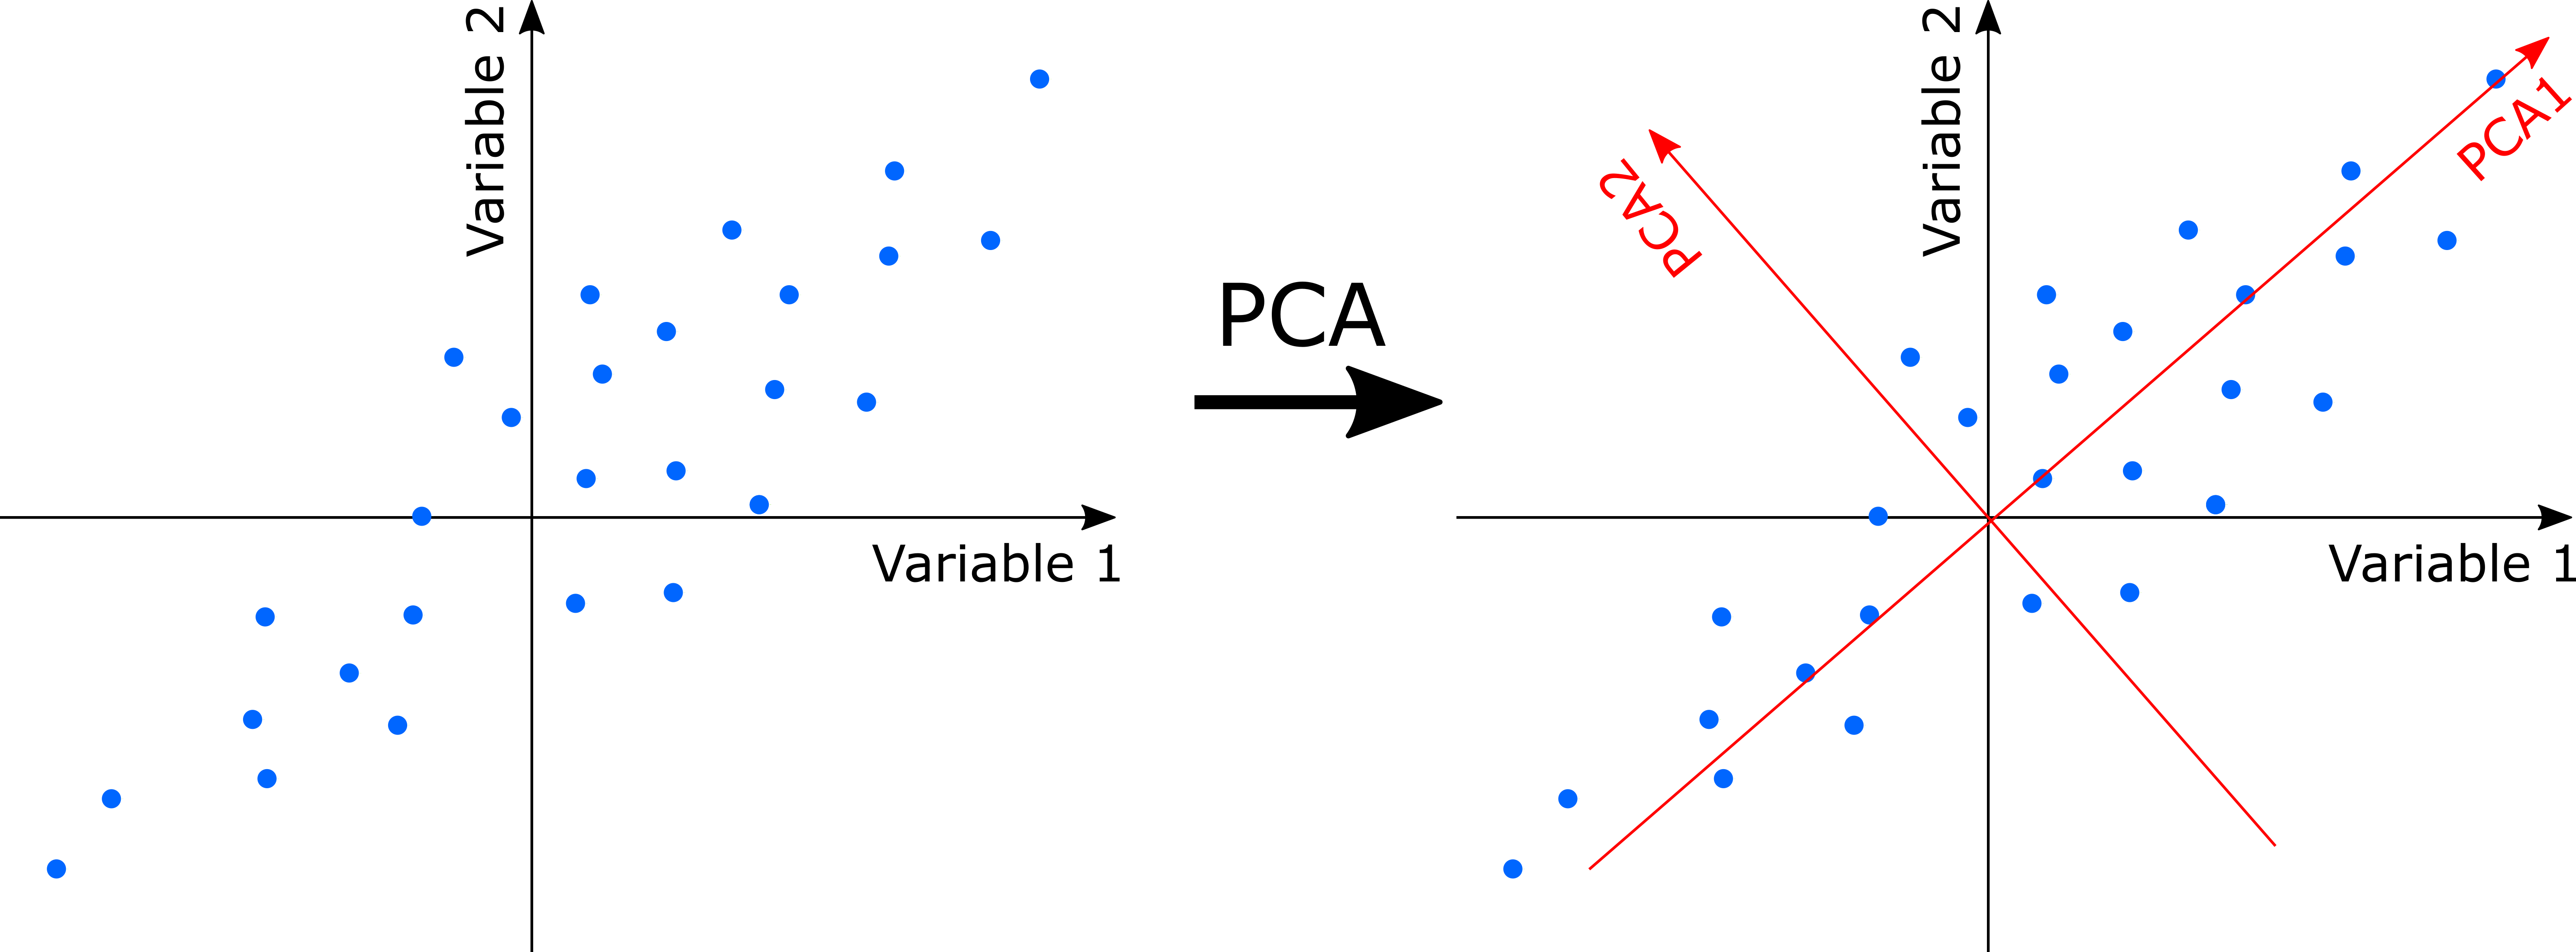

The left hand plot is a scatter plot of two variables in a data set that
have physical meaning. Using PCA, we can find two PCA variables so that
PCA1 has the largest variance and PCA2 has the next highest variance. The
PCA axis are rotated with respect original variables and are orthogonal
to each other. Note that PCA1 and PCA2 <strong>no longer</strong> correspond
to physical variables.

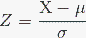

As a reminder:
    
<codeblock>
    In this equation, X is the data point, "mu" is the mean, and "sigma"
    is the standard deviation.

    Another scaling approach would be to make the mean of the data 0, and the
    variance 1.
</codeblock>

In case you are interested, the PCA is typically done using an eigenvalue
decomposition of a data covariance matrix. More over, taking the Singular Value
Decomposition (SVD) of a data matrix produces the same results. 


Principal Component Analysis (PCA) is a technique that can be used to find
the list of principal components for a data set. A
<a href="https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c">Reference</a> talks about the reasons
one might want to do a PCA analysis.

1. Do you want to reduce the number of variables, but are not able to identify variables to completely remove from consideration?

2. Do you want to ensure your variables are independent of one another?

3. Are you comfortable making your independent variables less interpretable?

I would add another reason,

4. If you want to better understand your data.

To compute the PCA of the data set, we can use a PCA method in SciKit-Learn.


As an example of computing the PCA of our data set, let's compute the first four
PCA values.

PCA works in an unsupervised learning setup, therefore we will remove the dependent
(i.e. response variable from our dataset). This is the x array below.

PCA also needs to use scaled data when doing it's computations. This is necessary
because PCA is trying to capture the total variance in the variables. Therefore the
input variables have to have similar scales of measurement. It removes the
mean from the data set and scales it to unit variance. To make sure the
scaling is correct, the mean and variance are computed. All of this is done
using a method from SciKit-Learn, <tt>StandardScaler</tt>. 

After the PCA is computed. The values of the first four PCA values are computed
for each data point in the data set. Then a few elements from the table are
printed.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


features = ['fixed acidity', 'volatile acidity', 'citric acid',
            'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates',
            'alcohol']
x = wine_set.loc[:, features].values
y = wine_set.loc[:, ['quality']].values

x = StandardScaler().fit_transform(x)

# Check scaling:
print("Checking scaling:")
print("mean = ",np.mean(x))
print("scale = ",np.std(x))

# Do the PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(x)
# Change array into a data frame
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4', 'PCA5',
                                                                         'PCA6', 'PCA7', 'PCA8', 'PCA9',
                                                                         'PCA10', 'PCA11'])

targetDataframe = wine_set[['quality']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

newDataframe

The columns tell you "how much" each principal component is included in
the specific data point. A table of numbers is a bit difficult to read,
but you can get an idea of what is happening. For example, let's look
at the first data point. PC1 and PC3 are much larger in magnitude than
PC2 (about 4x). PC1, PC2, PC3, are all <strong>MUCH</strong> larger
in magnitude than PC4. PC4 has very little impact. 

This tells you that PC1, PC3, are very important to the first data point.
Reducing the model below 3 principal components could really affect the
behavior. That is, the reduced model doesn't represent the first data
point very well (if the first data point is important to you). Even
thought PC2 doesn't contribute that much, it should be included and
you get that for "free" if you include PC1 to PC3.

Remember that the PCA values contribute to the overall <strong>variance</strong>
of the transformed model. Lets print out the PCA values for all the components.

In [ ]:
pca.explained_variance_ratio_

The array is a list of the variances for the principal components. If we look
at the first four principal components, we can see that PC1 explains 28.17%
of the overall variance, PC2 explains 17.51% of the variance, PCA3 explains
14.1%, and PCA4 explains 11.03%. The sum total variance using 4 PCAs, is 70.81%. 

Remember that we want a reduced model that has as much variance as the original
model so that the reduced model is an accurate representation of the full model.
Is 70.81% good or not? What is a good value? Why?

The variance for the principal components is easily plotted as a bar chart
below (plots are always a little easier to interpret). Sometimes this is
referred to as a "Scree" plot.

In [ ]:
import numpy as np

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
           'PCA10', 'PCA11']
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot n=11')
plt.show()

You can easily see that PCA1 has by far the largest variance (as expected).
Then there is a fairly large drop off to PCA2, PCA3, PCA4,
and so on. However, the PCA values for PCA2-PCA4 are still fairly
substantial, especially compared to PCA1. This may indicate that
a reduced model should at least keep the first 4 PCA's.

You can create a table of the sum of the variances as a function of the
number of components (see Lecture).

To illustrate how you could repeat the PCA analysis but with a
reduced number of PCA values, let's select 4 as the number of
values to keep.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


features = ['fixed acidity', 'volatile acidity', 'citric acid',
            'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates',
            'alcohol']
x = wine_set.loc[:, features].values
y = wine_set.loc[:, ['quality']].values

x = StandardScaler().fit_transform(x)

# Check scaling:
print("Checking scaling:")
print("mean = ",np.mean(x))
print("scale = ",np.std(x))

# Do the PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents,
                                  columns = ['PC1', 'PC2','PC3', 'PC4'])

targetDataframe = wine_set[['quality']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

pca.explained_variance_ratio_

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print(percent_variance)
columns = ['PC1', 'PC2','PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot n=4')
plt.show()

Next, we can plot the first and second principal components against one another.
The goal is to visualize the new dataset to see how PCA makes it easier to explain
the original data.

However, before we do that, let's recompute the PCA for 4 values.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


features = ['fixed acidity', 'volatile acidity', 'citric acid',
            'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates',
            'alcohol']
x = wine_set.loc[:, features].values
y = wine_set.loc[:, ['quality']].values

x = StandardScaler().fit_transform(x)

# Check scaling:
print("Checking scaling:")
print("mean = ",np.mean(x))
print("scale = ",np.std(x))

# Do the PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4'])

targetDataframe = wine_set[['quality']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

The first plot a scatter plot of PC1 against PC2. All values of wine
quality are used in the plot.

In [ ]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

Alternatively, you could use Seaborn to create a scatter plot with the wine
quality colored coded.

In [ ]:
sns.scatterplot(x=principalDataframe.PC1, y=principalDataframe.PC2, hue='quality', palette="deep", data=wine_set)
plt.title('PC1 against PC2')
plt.show()

From this chart it is difficult to understand if the two principal components
are actually orthogonal. No distinct groups appear. This might indicate
the both PCA's are necessary to model much of the original data.

Let's plot PC2 against PC3.

In [ ]:
sns.scatterplot(x=principalDataframe.PC2, y=principalDataframe.PC3, hue='quality', palette="deep", data=wine_set)
plt.title('PC2 against PC3')
plt.show()

Let's plot PC3 against PC4.

In [ ]:
sns.scatterplot(x=principalDataframe.PC3, y=principalDataframe.PC4, hue='quality', palette="deep", data=wine_set)
plt.title('PC3 against PC4')
plt.show()

Let's plot PC1 against PC4.

In [ ]:
sns.scatterplot(x=principalDataframe.PC1, y=principalDataframe.PC4, hue='quality', palette="deep", data=wine_set)
plt.title('PC1 against PC4')
plt.show()

From these plots, it is difficult to say if these four PCA values are enough
to represent the model. The next step would be to reduce the original data set,
compute the statistics, and compare to the statistics of the original model.

<a id='PCA Summary - Second'></a>
### 2.10.1 Summary of PCA

Principal Component Analysis is a tool for helping understand out data because it
helps us summarize the correlations across the variables with a smaller set of
linear combinations. If you combine this with the correlation analysis that we
previously did, you can start to see if some of the variables are not necessary
to capture the behavior of the model.

At first, this is a bit difficult to do, and this data set doesn't help too much,
but over time, you can use these two sets of tools, Correlation Analysis, and
PCA, to determine what variables are important and which ones are not.

Of course, making this determination is done considering the purpose of modeling
the data. Does a model create with a reduced data set, behave as a model created
with the whole data set? Do you care if a reduced model behaves as a model for
the entire data set?

<a id='Data Science Summary'></a>
# 3. Data Science Summary

This notebook uses exploratory data analysis, and a few other tools, to help us
better understand our data. However, as you may have noticed, data science is not
"push button" where you can create some tables and plots, and call it
a day. Rather it is very interactive where you have to keep your goals in mind
(goals in using the data set) as you explore and understand your data set.  You
also may have to "back-track" during your data analysis to try different things
and different values in the tools, to get a data set you think matches your goals.
In my opinion, this is the beginning and the essence of data science.

One last observation. Many researchers will try to jump from having a data set
to creating models. If they are not world experts, I will bet money that they will
get into trouble. They will have models that make no sense and models that produce
meaningless results. At that point, they will have to go back and examine their
data to better understand it. Real experts will do a data analysis, such as the
one we have done, to understand their data <em>before</em> they start making
models.

Above all:

* Practice, practice, practice
* Repeat the analysis several times to get a "feel" for the data
* Document what you think the data is telling you
* Have fun and learn something
